In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [3]:
!ls ../Datasets/AirQuality

AirQualityData_1 AirQualityData_2 Link.txt         Purple Air


In [3]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_3/airquality-1998_2017.csv', low_memory =False)
len(airQ_data)
airQ_data.tail()

,id,city_name,state_name,Week,Year,avg_aqi
61771,61382,Long Beach,California,53,2017,127.333333
61772,61454,Anaheim,California,53,2017,116.000000
61773,61540,El Cajon,California,53,2017,92.000000
61774,61596,Chico,California,53,2017,95.000000
61775,61764,Yuba City,California,53,2017,82.000000


In [4]:
len(airQ_data)

61776

In [182]:
#monthly -> yearly Mean value: method 1
airQ_data_mean = airQ_data.groupby(['County','Year'])['Value'].mean().reset_index()
airQ_data_mean.head()

,County,Year,Value
0,Alameda,2014,10.615572
1,Alameda,2015,11.195880
2,Alameda,2016,9.924854
3,Alameda,2017,13.576661
4,Alameda,2018,16.584750


In [6]:
len(airQ_data_mean)

295

In [5]:
#Removing city and taking avg
airQ_data_mean = airQ_data.groupby(['state_name','Week','Year'])['avg_aqi'].mean().reset_index()
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [6]:
len(airQ_data_mean)

1011

In [7]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['avg_aqi'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [8]:
len(airQ_data_mean)

1011

In [9]:
airQ_data_mean['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [14]:
#increasing week number by 1 to match influenza data
airQ_data_mean['Week'] = airQ_data_mean['Week']+1
airQ_data_mean['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [10]:
airQ_data_mean['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2006, 2012, 2017, 1998], dtype=int64)

In [11]:
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [16]:
#we will use this influenza data
influenza_data = pd.read_csv('../Datasets/Disease cases/influenza/AgeViewByWeek_Influenza.csv', low_memory=False)
influenza_data.head()

,Year,Week,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(Yamagata Lineage),B(Lineage Unspecified),H3N2v
0,2019,40,(0-4)yr,0,0,4,3,4,6,0,1,0
1,2019,41,(0-4)yr,0,0,2,5,3,15,0,0,0
2,2019,42,(0-4)yr,0,0,14,3,0,15,0,4,0
3,2019,43,(0-4)yr,0,0,4,4,0,12,0,3,0
4,2019,44,(0-4)yr,0,0,7,6,0,12,1,0,0


In [17]:
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [18]:
influenza_data['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997], dtype=int64)

In [20]:
#merging AQ data && influenza data

merged = pd.merge(airQ_data_mean,influenza_data,how='inner', left_on=['Year', 'Week'], right_on=['Year','Week'])
merged.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(Yamagata Lineage),B(Lineage Unspecified),H3N2v
0,California,1,1999,92.5000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.5000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.5000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.5000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.4375,(0-4)yr,1,0,47,0,27,0,0,0,0


In [21]:
len(merged)

3944

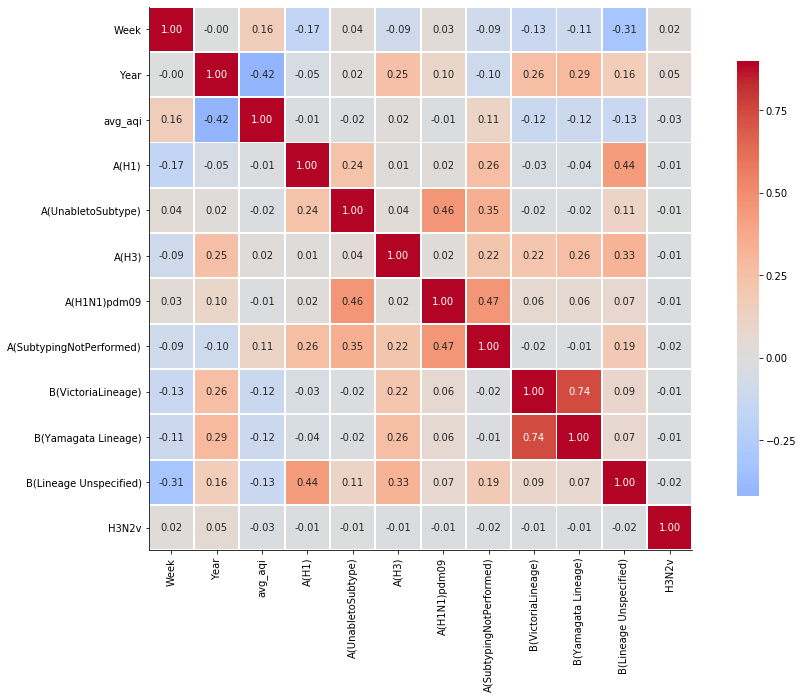

In [26]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [23]:
merged_filtered = merged[merged['AgeGroup'] == '(0-4)yr']

In [24]:
merged_filtered.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(Yamagata Lineage),B(Lineage Unspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
8,California,1,2001,87.254457,(0-4)yr,32,0,2,0,7,0,0,4,0
12,California,1,2002,61.261568,(0-4)yr,0,0,28,0,12,0,0,0,0
16,California,1,2003,55.143505,(0-4)yr,4,0,1,0,1,0,0,5,0


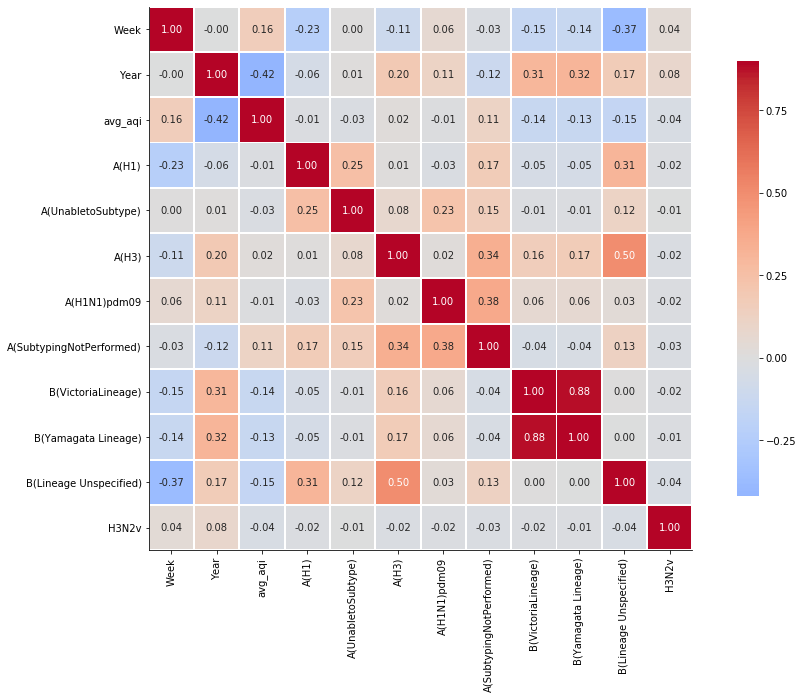

In [27]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

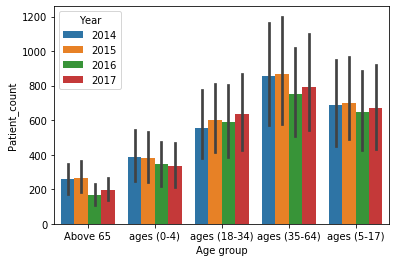

In [27]:
sns.barplot(x='Age group', y='Patient_count', hue='Year', data=merged, saturation=0.8)


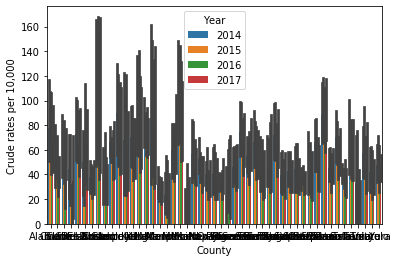

In [28]:
sns.barplot(x='County', y='Crude rates per 10,000', hue='Year', data=merged, saturation=0.8)



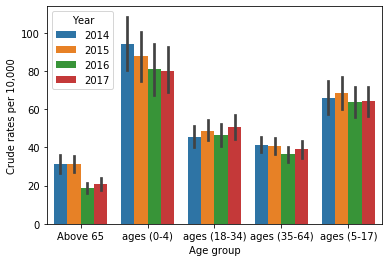

In [29]:
sns.barplot(x='Age group', y='Crude rates per 10,000', hue='Year', data=merged, saturation=0.8)

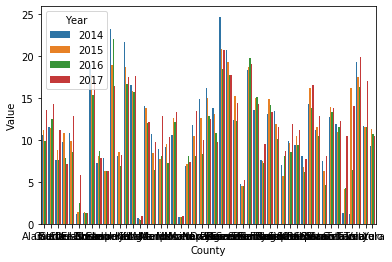

In [30]:
sns.barplot(x='County', y='Value', hue='Year', data=merged, saturation=0.8)



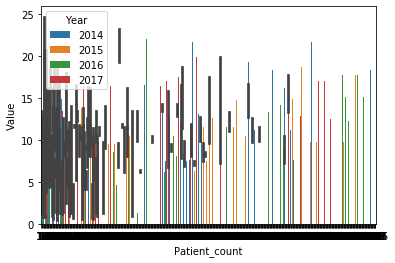

In [31]:
sns.barplot(x='Patient_count', y='Value', hue='Year', data=merged, saturation=0.8)



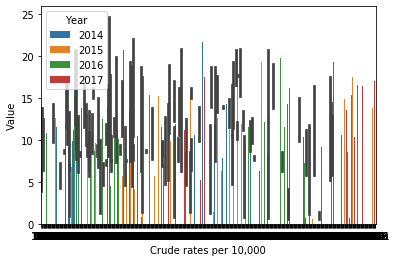

In [34]:
sns.barplot(x='Crude rates per 10,000', y='Value', hue='Year', data=merged, saturation=0.8)



In [193]:
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count


In [37]:
#county population file
county_population = pd.read_csv('../Datasets/Disease cases/asthma-4/county_population.csv',low_memory=False)
county_population.head()

,County,Year,Population
0,Alameda,2014,"1,588,576"
1,Alpine,2014,"1,163"
2,Amador,2014,"37,815"
3,Butte,2014,"223,137"
4,Calaveras,2014,"45,358"


In [38]:
#remove comma from Population column
county_population['Population'] = county_population['Population'].str.replace(',','').astype(int)
county_population.head()

,County,Year,Population
0,Alameda,2014,1588576
1,Alpine,2014,1163
2,Amador,2014,37815
3,Butte,2014,223137
4,Calaveras,2014,45358


In [39]:
#merging merged data && county_population data to get population column

merged = pd.merge(merged,county_population,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,Population
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),1588576
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),1588576
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),1588576
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),1588576
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,1588576


In [40]:
#Calculating patient ratio

merged['Patient_ratio'] = merged['Patient_count']/merged['Population']
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,Population,Patient_ratio
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),1588576,0.000936
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),1588576,0.001322
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),1588576,0.001137
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),1588576,0.002206
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,1588576,0.000636


In [41]:
#Calculating patient percentage

merged['Patient_percent%'] = merged['Patient_ratio']* 10000
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,Population,Patient_ratio,Patient_percent%
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),1588576,0.000936,9.360585
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),1588576,0.001322,13.219386
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),1588576,0.001137,11.368672
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),1588576,0.002206,22.063785
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,1588576,0.000636,6.364190


In [42]:
merged.dtypes
merged['AgeGroupCat']= merged['Age group'].cat.codes

In [43]:
merged.head()

,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Age group,Population,Patient_ratio,Patient_percent%,AgeGroupCat
0,Alameda,2014,10.615572,6001,148.8,141.4,156.6,1487,ages (0-4),1588576,0.000936,9.360585,1
1,Alameda,2014,10.615572,6001,84.5,80.9,88.2,2100,ages (5-17),1588576,0.001322,13.219386,4
2,Alameda,2014,10.615572,6001,47.7,45.5,50.0,1806,ages (18-34),1588576,0.001137,11.368672,2
3,Alameda,2014,10.615572,6001,54.5,52.7,56.3,3505,ages (35-64),1588576,0.002206,22.063785,3
4,Alameda,2014,10.615572,6001,51.4,48.3,54.7,1011,Above 65,1588576,0.000636,6.364190,0


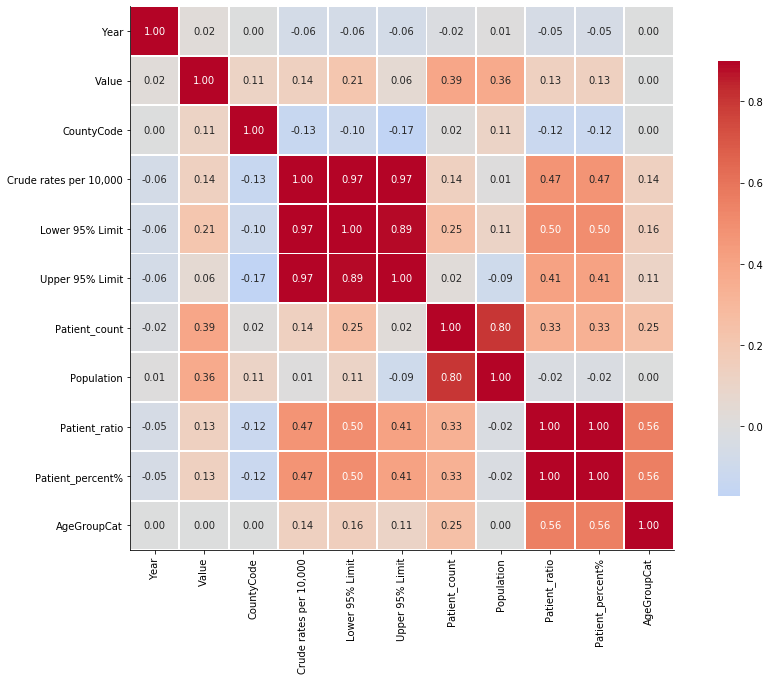

In [44]:
#again measuring the correlation - without applying county filter

corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

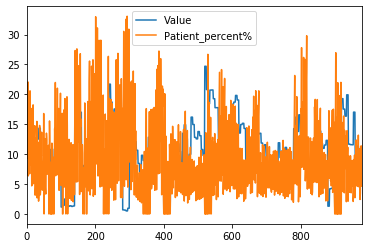

In [45]:
#plotting AQ index value vs. patient ratio
merged[['Value','Patient_percent%']].plot()

In [ ]:
merged[['Value','Crude rates per 10,000']].plot()

In [ ]:
len(merged['County'].unique())

In [ ]:
merged_filter_for_plot = merged[(merged['County'].isin(['Santa Clara']))]
merged_filter_for_plot

In [ ]:
#plotting AQ index value vs. patient ratio
merged_filter_for_plot[['Value','Patient_percent%']].plot()

In [ ]:
merged_filter_for_plot[['Value','Crude rates per 10,000']].plot()

In [ ]:
merged_filter_for_plot

In [ ]:
plt.figure()

x = merged_filter_for_plot['Crude rates per 10,000']
y = merged_filter_for_plot['Value']


plt.plot(x,y)


In [ ]:
plt.figure()

x = merged_filter_for_plot['Year']
y = merged_filter_for_plot['Patient_percent%']

plt.plot(x,y)

In [ ]:
plt.figure()

x = merged_filter_for_plot['Value']
y = merged_filter_for_plot['Year']

plt.plot(y,x)

In [ ]:
plt.figure()

x = merged_filter_for_plot['Year']
y1 = merged_filter_for_plot['Patient_ratio'] * 10000
y2 = merged_filter_for_plot['Value']

plt.plot(x,y1)
plt.plot(x,y2)

In [ ]:
min(merged['Value'])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = merged['County']
y1 = merged['Crude rates per 10,000'] / 10
y2 = merged['Value']
y3 = merged['Age group']
#plt.axes([6000,6200,10,10])

r_colors = (1,0,0)
g_colors = (0,1,0)
colors = (1,0,0)


plt.scatter(x, y1,  c=r_colors, alpha=0.5)
plt.scatter(x, y2,  c=g_colors, alpha=0.5)


plt.axis([-1,10,0,30])
plt.xticks(rotation=90)
# ax.plot(x,y1)
# ax.plot(x,y2)
ax.set_aspect(aspect=0.2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = merged['County']
y1 = merged['Crude rates per 10,000'] / 10
y2 = merged['Value']
y3 = merged['Age group']
#plt.axes([6000,6200,10,10])

r_colors = (1,0,0)
g_colors = (0,1,0)
b_colors = (0,0,1)
colors = (1,0,0)


plt.scatter(x, y1,  c=r_colors, alpha=0.5)
plt.scatter(x, y2,  c=g_colors, alpha=0.5)
#plt.scatter(x,y3, c=b_colors, alpha=0.5)

plt.axis([0,10,0,30])
plt.xticks(rotation=90)
# ax.plot(x,y1)
# ax.plot(x,y2)
ax.set_aspect(aspect=0.2)

In [ ]:
plt.figure(figsize=[10,8])
x = 0.3*np.random.randn(1000)
y = 0.3*np.random.randn(1000)

x = merged['County']
y1 = merged['Crude rates per 10,000'] / 10
y2 = merged['Value']
y3 = merged['AgeGroupCat']

plt.xticks(rotation=90)
n, bins, patches = plt.hist([y2,y1], bins = 'auto')
plt.xlabel('County')
#plt.hist(y2, bins, histtype='step', label=['second again'])



In [ ]:
means = 10, 20
stdevs = 4,2
dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),columns=['Value','Crude rates per 10,000'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

In [ ]:
fig, ax = plt.subplots()

dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [ ]:
merged.head()

In [ ]:
import plotly.figure_factory as ff

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=merged['County'], values=merged['Crude rates per 10,000'], scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()

In [ ]:
! conda install -c plotly plotly-geo geopandas -y

In [ ]:
! conda install pyshp -y

In [ ]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

In [ ]:
y1.shape

In [ ]:
#merged.groupby('County')

airQ_data_min = merged.groupby(['County', 'Age group', 'Year'], as_index=False)['Crude rates per 10,000'].max()
airQ_data_min.head()

In [ ]:
merged[merged['County'] == 'Alameda']

In [ ]:
sns.distplot(merged_filter_for_plot['Patient_ratio'])
plt.show()

In [ ]:
sns.distplot(merged_filter_for_plot['Patient_ratio']* 10000)
plt.show()

In [ ]:
sns.distplot(merged_filter_for_plot['Value'])
plt.show()

In [ ]:
# Method 1: on the same Axis
sns.distplot( (merged_filter_for_plot["Patient_percent%"]) , color="blue", label="Patient_ratio")
sns.distplot( merged_filter_for_plot["Value"] , color="red", label="Value")
plt.legend()
 
plt.show()


In [ ]:
merged_filter_for_plot.Value = merged_filter_for_plot.Value.astype(float)
merged_filter_for_plot

In [ ]:
merged

In [ ]:
# Prep Training and Test data.
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [ ]:
#X and Y(target) for linear regression
Y_trainData = trainData[['Crude rates per 10,000']]
X_trainData= trainData.drop('Crude rates per 10,000', axis =1 )

Y_testData = testData[['Crude rates per 10,000']]
X_testData= testData.drop('Crude rates per 10,000', axis =1 )
X_trainData = X_trainData.drop('County', axis=1)

In [ ]:

X_testData = X_testData.drop('County', axis=1)
X_testData

In [ ]:
# Creating linear regression model.
model1= LinearRegression()

In [ ]:
model1.fit(X_trainData,Y_trainData)
predictions = model1.predict(X_testData)

In [ ]:
# Get the slope and intercept of the line best fit.
print(model1.intercept_)


print(model1.coef_)

In [ ]:
# print the R-squared value for the model
model1.score(X_trainData, Y_trainData)

In [ ]:
# print the R-squared value for the model
print(model1.score(X_testData,Y_testData)  )

In [ ]:
#X and Y(target) for logistic regression 
X_trainData = trainData[['Value','CountyCode']]
Y_trainData= trainData.Patient_ratio
X_testData= testData[['Value','CountyCode']]
Y_testData= testData.Patient_ratio

In [ ]:
Y_trainData = trainData[['Crude rates per 10,000']]
X_trainData= trainData.drop('Crude rates per 10,000', axis =1 )

Y_testData = testData[['Crude rates per 10,000']]
X_testData= testData.drop('Crude rates per 10,000', axis =1 )
X_trainData = X_trainData.drop('County', axis=1)
X_testData = X_testData.drop('County', axis=1)



In [ ]:
X_testData

In [ ]:
# Creating Logistic regression model.
model2= LogisticRegression()

In [ ]:
model2.fit(X_trainData,Y_trainData)
predictions = model2.predict(X_testData)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    merged.drop(labels=['Crude rates per 10,000', 'County'], axis=1),
    merged['Crude rates per 10,000'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

In [ ]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)




In [ ]:
print(clf.intercept_)


print(clf.coef_)

In [ ]:
np.round(clf.coef_, decimals=2) > 0

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(clf, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

In [ ]:
order = selector.ranking_
order

In [ ]:
feature_ranks = []

for i in order:
    feature_ranks.append(f"{i}.{merged.columns[i]}")

feature_ranks    

## Below code is reference from 

https://github.com/kidaufo/StatisticalModeling/blob/master/GLM.ipynb
https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

In [ ]:
X_train.head()

In [ ]:
x_train_filtered = X_train[X_train['Year'] == 2016]
#x_train_filtered['CountyCode']
x_train_filtered

In [ ]:
# Poisson regression code

import statsmodels.api as sm
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

#x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
#y = poisson(mu)


filtered = merged[merged['Year'] == 2016].reset_index() 

x = filtered['CountyCode']
y = filtered['Value']


exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())


In [ ]:
filtered.head()

In [ ]:

y_pred = res.predict(exog)

y_pred.head()


In [ ]:
idx = np.array(x).argsort()
x_ord, y_pred_ord = np.array(x[idx]), y_pred[idx]



In [ ]:
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")



In [ ]:
# Normal distribution + log link function
from numpy.random import uniform, normal, poisson, binomial


np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)
exog, endog = sm.add_constant(x), y


norm_mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = norm_mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

In [ ]:
#logistic regression


np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = binomial(n=1, p=q)

exog, endog = sm.add_constant(X_train), y_train

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('logistic_regression.png')

In [ ]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = normal(mu, sd)

In [ ]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM_data.png')

In [ ]:
exog = sm.add_constant(x)
endog = y

# Normal distribution + log link function
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:

merged2_filtered2 = merged[merged['County'] == 'Santa Clara']



merged2_filtered2

In [ ]:
endog = np.asarray(merged2_filtered2['Crude rates per 10,000'])
exog = sm.add_constant(np.asarray(merged2_filtered2['Value']))

# Normal distribution + log link function
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

In [ ]:
#n12 = np.squeeze(np.asarray(X_test))


y_pred = res.predict(exog)



In [ ]:
X_train['Value']

In [ ]:
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
idx

In [ ]:
merged2_filtered

In [ ]:
# Air quality Vs County - Poisson regression code 

import statsmodels.api as sm
np.random.seed(5)
n_sample = 100
a = 0.5
b = -0.5

#x1 = np.array(filtered['CountyCode']).astype(np.int64)

x = np.array(merged['Value'])

#x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
#y_possion = poisson(mu)


filtered = merged[merged['Year'] == 2016].reset_index() 


#y1 = filtered['Value']
y = merged['Crude rates per 10,000']
sd = 0.8
#y_norm = normal(mu, sd)


a = 3.0
b = -9.0

x = np.sort(x)

q = logistic(a * x + b)
#y_log = binomial(n=1, p=q)


exog, endog = sm.add_constant(x), y

# Poisson regression
poisson_mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
poisson_res = poisson_mod.fit()
display(poisson_res.summary())

exog, endog = sm.add_constant(x), y


# Normal distribution + log link function
norm_mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
norm_res = norm_mod.fit()
display(norm_res.summary())

exog, endog = sm.add_constant(x), y


# Logistic regression
log_mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
log_res = log_mod.fit()
display(log_res.summary())


In [ ]:
mu

In [ ]:

for model in [poisson_res, norm_res, log_res]:
    print('model ')
    
    y_pred = model.predict(exog)


    idx = x.argsort()
    x_ord, y_pred_ord = x[idx], y_pred[idx]
    plt.figure()


    plt.plot(x_ord, y_pred_ord, color='m')
    plt.scatter(x, y,  s=20, alpha=0.8)
    plt.xlabel("X")
    plt.ylabel("Y")

In [49]:
merged['Date_Time'] = pd.to_datetime(merged.Year , format = '%Y')
merged.index = merged.Date_Time

In [ ]:
from pyramid import arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [208]:
merged['Patient_count'] = merged['Patient_count'].str.replace(',','').astype(int)

merged.head()



,County,Year,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,Alameda,2014,10.615572,6001,63.2,62.0,64.5,9909
1,Alameda,2015,11.195880,6001,62.9,61.7,64.2,9929
2,Alameda,2016,9.924854,6001,55.4,54.3,56.5,9073
3,Alameda,2017,13.576661,6001,53.9,52.7,55.0,8916
4,Butte,2014,11.526889,6007,43.8,41.1,46.6,978


In [209]:
merged = merged.reset_index(drop=True)  
columns = ['Year','Value','Crude rates per 10,000','Lower 95% Limit','Upper 95% Limit','CountyCode','Patient_count']

merged_features = merged[columns]
    
merged_features 

,Year,Value,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,CountyCode,Patient_count
0,2014,10.615572,63.2,62.0,64.5,6001,9909
1,2015,11.195880,62.9,61.7,64.2,6001,9929
2,2016,9.924854,55.4,54.3,56.5,6001,9073
3,2017,13.576661,53.9,52.7,55.0,6001,8916
4,2014,11.526889,43.8,41.1,46.6,6007,978
...,...,...,...,...,...,...,...
191,2017,17.019749,32.9,31.7,34.1,6111,2826
192,2014,9.245116,39.2,36.6,42.0,6113,813
193,2015,11.344165,40.7,38.0,43.5,6113,851
194,2016,10.715124,35.4,33.0,38.0,6113,768


In [132]:
#creating the train and validation set
train = merged_features[:int(0.8*(len(merged_features)))]
valid = merged_features[int(0.8*(len(merged_features))):]



In [95]:
train_array = np.asarray(train)
valid_array = np.asarray(valid)

In [96]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_array)
model_fit = model.fit()
model_fit.y

/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[6.00100000e+03, 1.06155720e+01, 1.48800000e+02, 1.00000000e+00],
       [6.00100000e+03, 1.06155720e+01, 8.45000000e+01, 4.00000000e+00],
       [6.00100000e+03, 1.06155720e+01, 4.77000000e+01, 2.00000000e+00],
       ...,
       [6.08900000e+03, 1.42615329e+01, 7.40000000e+01, 4.00000000e+00],
       [6.08900000e+03, 1.42615329e+01, 7.64000000e+01, 2.00000000e+00],
       [6.08900000e+03, 1.42615329e+01, 5.87000000e+01, 3.00000000e+00]])

In [97]:

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_array))
prediction

array([[6.08896043e+03, 1.40463342e+01, 3.97152993e+01, 1.91566368e+00],
       [6.08907740e+03, 1.39089157e+01, 4.45959330e+01, 1.91847815e+00],
       [6.08918218e+03, 1.37842039e+01, 4.58685138e+01, 2.01789504e+00],
       [6.08927307e+03, 1.36626368e+01, 4.51718657e+01, 2.01250226e+00],
       [6.08936560e+03, 1.35499212e+01, 4.49258052e+01, 2.00408781e+00],
       [6.08945908e+03, 1.34458929e+01, 4.48449317e+01, 2.00539950e+00],
       [6.08955215e+03, 1.33493693e+01, 4.47231709e+01, 2.00642242e+00],
       [6.08964494e+03, 1.32598089e+01, 4.45974240e+01, 2.00655048e+00],
       [6.08973760e+03, 1.31767717e+01, 4.44838526e+01, 2.00673466e+00],
       [6.08983010e+03, 1.30997941e+01, 4.43776026e+01, 2.00697883e+00],
       [6.08992245e+03, 1.30284429e+01, 4.42769273e+01, 2.00719714e+00],
       [6.09001466e+03, 1.29623203e+01, 4.41818668e+01, 2.00739525e+00],
       [6.09010673e+03, 1.29010569e+01, 4.40921130e+01, 2.00758184e+00],
       [6.09019868e+03, 1.28443087e+01, 4.40072467e

In [98]:
cols = train.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)

In [99]:

from sklearn.metrics import mean_squared_error 

for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for CountyCode is :  5.086413846029044
rmse value for Value is :  4.4840947869257
rmse value for Crude rates per 10,000 is :  30.99157795345708
rmse value for AgeGroupCat is :  1.4168771964336442


In [100]:
#make final predictions
model = VAR(endog=merged_features)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[6.11332270e+03 1.06968447e+01 6.01133381e+01 2.58798065e+00]]


/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [222]:
from sklearn.model_selection import train_test_split

y=  merged_features['Crude rates per 10,000']
X= merged_features.drop('Crude rates per 10,000' , axis =1)  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_test.shape

(20, 6)

In [227]:


y_train1 = np.asarray(y_train.values, dtype="int")
y_test1 = np.asarray(y_test.values, dtype="int")

In [228]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train1)

y_pred=clf.predict(X_test)

In [229]:
y_test1, y_pred

(array([37, 66, 63, 62, 50, 30, 37, 50, 55, 51, 35, 38, 57, 31, 80, 32, 25,
        55, 46, 29]),
 array([38, 64, 62, 63, 53, 31, 40, 52, 57, 52, 34, 38, 54, 30, 78, 31, 21,
        53, 40, 30]))

In [230]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred)*100

5.0